## Introduction

Project **Data analytics for the purpose of bank customer segmentation**.

### Project Description


**Context**


The bank "Metanprom" placed an order for data analysis in order to segment its customers.

The bank manager wants to formulate customer segments and recommend specific products that might be of interest to different customer segments.


We have access to a dataset with information on 10,000 customers. Bank Metanprom. The bank has branches in Yaroslavl and regional cities: Rostov the Great and Rybinsk.

### Data Description

**Data Description**:


File `bank_dataset.csv`:
       
- `userid` - unique user id;
- `score` — credit scoring points;
- `City` — city name;
- `Gender` - gender,
- `Age` - age,
- `Objects` - the number of objects in the property,
- `Balance` — account balance,
- `Products` - the number of products used by the client,
- `CreditCard` - whether there is a credit card,
- `Loyalty` - active client,
- `estimated_salary` — client's salary,
- `Churn` - left or not.

### Project Breakdown

**Project Objective:** To segment the bank's customers in order to formulate a targeted marketing offer for the product and recommendations for improving customer service.




**Step 1: Download libraries and explore general information**.

This step involves importing the required libraries and loading the bank's customer data in preparation for further analysis.

File path: `datasets/bank_dataset.csv.`.

A brief conclusion.


**Step 2. Data pre-processing**.

This step includes identifying duplicates, cleaning and transforming customer data, identifying patterns in gaps (if any), handling missing values and preparing data for exploratory data analysis and segmentation.

Section Conclusion.



**Step 3. Exploratory Data Analysis**.

This stage involves visualising and summarising customer data to identify patterns and trends, and selecting appropriate characteristics for customer segmentation.

At the end of the stage - the collection of observations on the above issues into an overall conclusion.


**Step 4. Segmentation of bank customers**.

This step involves segmenting the bank's customers into no more than 4 main categories based on the number of products used and the churn rate.
It is also necessary to assess the degree of similarity between the different categories and to draw a final boundary between the categories.

Finish the stage by formulating recommendations for the marketing offer of banking products based on the different segments of the bank's customers.


**Step 5. Statistical analysis of the data**.

In this step, statistical methods are used to further investigate and verify the segments obtained in the segmentation stage.
Testing the hypothesis of a difference in income between customers who use two banking products and those who use one.
Formulate and test the second statistical hypothesis in relation to the data presented (preliminary - are there differences in the balance of those who leave the bank and those who remain).

Conclusions for the section.


**Step 6. Preparing the presentation**.

Creating of a dashboard.
Final conclusions and recommendations. Preparation of the research presentation for a bank manager.

## Library downloads and general information for exploration

### Library import

Downloading the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as stats

In [2]:
pip install matplotlib --upgrade

Note: you may need to restart the kernel to use updated packages.


### Data download and preparation for analysis

Load data from CSV file into variables.

File path: `datasets/bank_dataset.csv.` 


In [3]:
try:
    bank_dataset= pd.read_csv('bank_dataset.csv')
except FileNotFoundError:
    bank_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

### General information in the data set.
Let's display the first 5 lines of the data frame.

In [4]:
print('Dataset - clients of the bank:')
bank_dataset.head()

Dataset - clients of the bank:


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Let's look at the basic information on the table.

In [5]:
print('Information about the dataset {0!r}:'.format('bank_dataset'), '\n')
bank_dataset.info()

Information about the dataset 'bank_dataset': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Let's look at the basic information on the table.

In [6]:
print('Information about the data in the dataset {0!r}:'.format('bank_dataset'), '\n')
bank_dataset.describe()

Information about the data in the dataset 'bank_dataset': 



,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Let's look at the main values in columns with textual information.

In [7]:
print(bank_dataset['City'].unique())
print(bank_dataset['Gender'].unique())

['Ярославль' 'Рыбинск' 'Ростов Великий']
['Ж' 'М']


### Brief conclusion


Columns `userid`,  `score`, `Age`, `Objects`, `Products` - store quantitative information, written as `'int'`.

The `City` and `Gender` columns store qualitative information, written as `object`.

Not all establishments have opening hours.
 
The columns `Balance` and `estimated_salary` - the amount of money, are stored in `float` format. Most rows have the first parameter (**6 383**), the second - all rows.

Columns `CreditCard`, `Loyalty`, `Churn` - written as `int`, take values **0** and **1**.

We see **10,000** records in the table before the allocation of duplicates (omissions).

`score` column - takes values from **350** to **850**.

Column `City` is the name of the city, meaning - 'Yaroslavl' 'Rybinsk' 'Rostov the Great'.

`Gender` column - gender takes the values 'F' 'M'.

Column `Age`' - age - from **18** to **92**.

The `Objects` column is the number of items in the property, the minimum value is **0**, the maximum value is **10**.

The `Balance` column is the account balance, from **3 768** to **250 898**.

The `Products` column is the number of products used by the customer, from **1** to **4**.

The  `estimated_salary` column is the wage, from **11** to **199,992**.

## Data preprocessing

Identification of duplicates, clean and transform customer data, identify patterns in gaps (if any), handle missing values, and prepare data for exploratory data analysis and segmentation.
### Handling column names
Let's convert the columns to lower case.

In [8]:
#reduce to lowercase
bank_dataset.rename(columns=lambda x: x.lower(), inplace=True)

In [9]:
#other names
bank_dataset = bank_dataset.rename(columns={'userid':'user_id', 'creditcard':'credit_card'})
#watching the results
bank_dataset.head()
#making a copy
bank_dataset_copy = bank_dataset.copy()

### Handling duplicates
Find duplicates and clear the table.

In [10]:
print(f'Number of explicit duplicates in the dataframe - {bank_dataset.duplicated().sum()}')
print(f'Number of explicit duplicates in the customer column - {bank_dataset["user_id"].duplicated().sum()}')

Number of explicit duplicates in the dataframe - 0
Number of explicit duplicates in the customer column - 0


We see no duplicates.

### Let's see the oddities
Look at the salary column.

This year the minimum wage is set at 16,242 roubles (https://www.garant.ru/news/1591661/?ysclid=ldbpxbxaff90376676).

Also, the living wage for three categories of the population:
able-bodied citizens - 15 669 R;
pensioners - 12,363
children - 13 944 (not in our data set)
(https://journal.tinkoff.ru/news/mrot-2023/?ysclid=ldbq1xy5a7149857202)

Assuming that benefits are also taken into account in the calculation of the wage, the wage cannot be less than 5,000 rubles.

In [11]:
mrot = 16242
print(
    'The number of users with a salary estimate less than the minimum wage:',
    bank_dataset[bank_dataset['estimated_salary'] < mrot]['user_id'].nunique())
print(
    'The number of users with a salary estimate less than 1000:',
    bank_dataset[bank_dataset['estimated_salary'] < 1000]['user_id'].nunique())
print(
    'The number of users with a salary estimate less than 100:',
    bank_dataset[bank_dataset['estimated_salary'] < 100]['user_id'].nunique())

The number of users with a salary estimate less than the minimum wage: 802
The number of users with a salary estimate less than 1000: 59
The number of users with a salary estimate less than 100: 4


Clarifications from the client: this is also a calculated indicator, if the bank has information about real income, then this information is used, otherwise it works out the model that estimates the salary.
Offer the bank to calibrate the model if this is an important indicator: this can affect the scoring and lead to both errors of the first and second types when setting the scoring and the decision to issue a loan.

### Pass processing
Identification of patterns in gaps (if any), processing of missing values.

In [12]:
print('Number of gaps in the table:','\n')
print(bank_dataset.isnull().sum())

Number of gaps in the table: 

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64


As we saw in the first step, we see gaps only in the `balance` column - most of the rows have this parameter (**6 383**) , let's see which categories have them.
### Let's find patterns
Identification of patterns in gaps (if any), processing of missing values.
Let's set a column that will describe whether the balance is filled or not.

In [13]:
#create a column with an empty balance
bank_dataset['nan_balance'] = 0
bank_dataset.loc[bank_dataset['balance'].isnull() , 'nan_balance'] = 1
#create numeric variables for gender and city
bank_dataset['is_w'] = bank_dataset['gender']
bank_dataset.replace({'is_w': {'Ж':1, 'М':0}}, inplace = True)
bank_dataset['city_num'] = bank_dataset['city']
bank_dataset.replace({'city_num': {'Ярославль': 0, 'Рыбинск': 1, 'Ростов Великий': 2 }}, inplace = True)
#look info
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
 12  nan_balance       10000 non-null  int64  
 13  is_w              10000 non-null  int64  
 14  city_num          10000 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1.1+ MB


In [14]:
#create a function to split into groups by percentile
def create_groups(df, column_name, new_column_name):
    gr_25 =  np.percentile(df[column_name], 25)
    gr_50 = np.percentile(df[column_name], 50)
    gr_75 = np.percentile(df[column_name], 75)
    
    percentiles = [0, gr_25, gr_50, gr_75, np.inf]
    labels = [1, 2, 3, 4]
    df[new_column_name] = pd.cut(df[column_name], bins=percentiles, labels=labels, right=False).astype(int)
    
    return df

In [15]:
#dividing into groups by percentile age and salary
bank_dataset = create_groups(bank_dataset, 'age', 'age_gr')
bank_dataset = create_groups(bank_dataset, 'estimated_salary', 'salary_group')


Let's look at the correlations for the empty balance.

In [16]:
sorted_corr = bank_dataset.select_dtypes(include=np.number).corr()[['nan_balance']].sort_values(by='nan_balance')
sorted_corr

,nan_balance
city_num,-0.378936
churn,-0.122357
age_gr,-0.043231
age,-0.034950
estimated_salary,-0.014486
salary_group,-0.012565
score,-0.008380
loyalty,0.004116
is_w,0.004513
user_id,0.010559


We need to pay attention to the city, products, an indicator of whether the user has remained or not.

In [17]:
#creation a function to find the skip percentage
def group_and_sort(df, variables):
    df_grouped = df.groupby(variables).agg({
        'nan_balance': ['sum', 'count']
     }).reset_index().set_axis(variables + ['nan_count', 'all'], axis='columns')
    df_grouped['nan_%'] = df_grouped['nan_count'] / df_grouped['all']
    df_grouped.sort_values(by='nan_%', ascending=False, inplace=True)
    print('\n', 'Percentage gaps in data grouped by', ','.join(variables))

    return df_grouped

Let's build the percentage of gaps for the columns: city, products, an indicator of whether the user remained or not.

In [18]:
#call a function to find the percent gap
group_and_sort(bank_dataset, ['city'])


 Percentage gaps in data grouped by city


,city,nan_count,all,nan_%
1,Рыбинск,1199,2477,0.484053
2,Ярославль,2418,5014,0.482250
0,Ростов Великий,0,2509,0.000000


There are passes in Rybinsk and Yaroslavl, but not in Rostov the Great.

In [19]:
#call a function to find the percent gap
group_and_sort(bank_dataset, ['products'])


 Percentage gaps in data grouped by products


,products,nan_count,all,nan_%
1,2,2600,4590,0.566449
2,3,98,266,0.368421
3,4,14,60,0.233333
0,1,905,5084,0.178009


Passes are in for customers with two and three products, for four and 1 product there are fewer passes.

In [20]:
#call a function to find the percent gap
group_and_sort(bank_dataset, ['churn'])


 Percentage gaps in data grouped by churn


,churn,nan_count,all,nan_%
0,0,3117,7963,0.391435
1,1,500,2037,0.245459


In [21]:
#call a function to find the percent gap
group_and_sort(bank_dataset, ['city','products','churn']).query('city !="Ростов Великий"')


 Percentage gaps in data grouped by city,products,churn


,city,products,churn,nan_count,all,nan_%
11,Рыбинск,3,0,14,14,1.000000
18,Ярославль,3,0,22,22,1.000000
9,Рыбинск,2,0,835,1096,0.761861
16,Ярославль,2,0,1679,2232,0.752240
12,Рыбинск,3,1,27,52,0.519231
17,Ярославль,2,1,60,135,0.444444
19,Ярославль,3,1,35,82,0.426829
20,Ярославль,4,1,12,29,0.413793
15,Ярославль,1,1,230,564,0.407801
8,Рыбинск,1,1,108,267,0.404494


Most of the passes are in Rybinsk and Yaroslavl, among clients with 2 and 3 products, among clients who have remained clients of the bank.

### Brief conclusion


There are no obvious duplicates in the table.
The column with salary estimates contains salary values for all categories of customers, and there are some strange values.

Number of users with a salary estimate below the minimum wage: 802
Number of users with a salary estimate less than 1000: 59
Number of users with salary estimate less than 100: 4


There are gaps only in the `balance` column - most of the lines have this parameter (6,383 out of 10,000).
Correlations for the empty balance designation column indicate that you need to pay attention to the city, products, an indicator of whether the user remained or not.

The percentage of gaps for columns - city, products, indicator of whether the user remained or not - show that the most frequent gaps Most of the gaps are in Rybinsk and Yaroslavl, for customers with 2 and 3 products, for customers who remained bank customers.

## Exploratory data analysis

We visualize and summarize customer data to identify patterns and trends, as well as select appropriate features for customer segmentation.

### Define the histogram construction function


In [22]:
def column_hist(df, col_hist, col_hue,  name): #table, column name for values, column for hue, table name
    #assign classic style to plot with matplotlib
    plt.figure(figsize=(8, 5))
    sns.set_theme()
    # st
    sns.set_style('ticks')
    sns.set_context('notebook')
    sns.set_palette('pastel')
    # histohramma for total_income, and  KDE
    sns.histplot(x=col_hist, hue = col_hue, data=df, kde=True)
    # remove extra lines
    sns.despine(offset=10, trim=True)
    # specify the title of the graph and the labels of the axes using matplotlib
    plt.title('Distribution {}'.format(name))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    # display the graph
    plt.show()

### Balance distribution broken down by outflow status
Let's answer the question about the distribution of customer balance. The distribution is best viewed on a histogram.

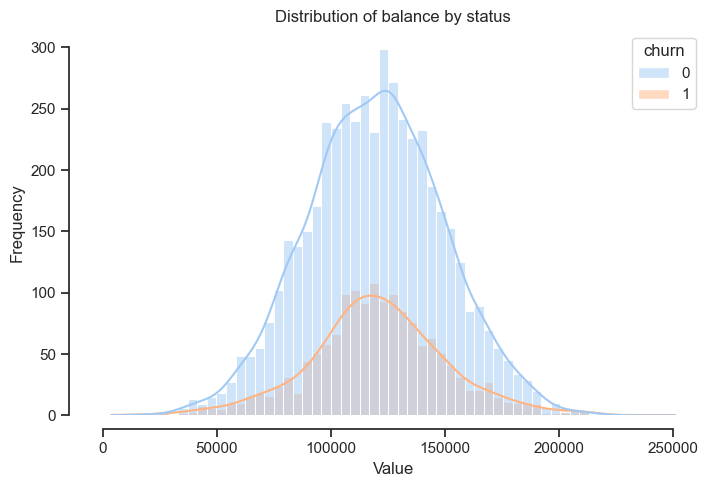

In [23]:
column_hist(bank_dataset, 'balance', 'churn',  'of balance by status')

We see that the balance is normally distributed. With a frequency peak of 100,000 - 150,000 (with a peak of 50-100 clients from the status of "left" and up to 300 in the status of current clients)

### Income distribution by churn status
Let's answer the question about the distribution of customer balance. Let's look at the distribution on the histogram.


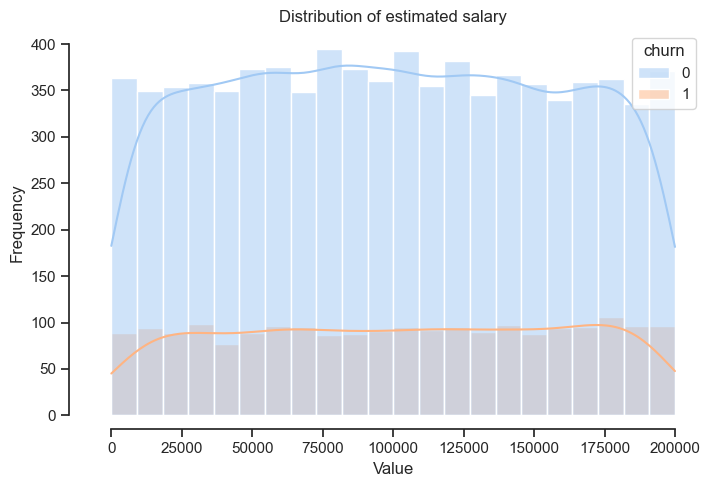

In [24]:
column_hist(bank_dataset, 'estimated_salary', 'churn',  'of estimated salary')

Wages are distributed very evenly, with no visible peaks in both categories.
### Age distribution by churn
Let's answer the question about the distribution of customer balance. Let's look at the distribution on the histogram.

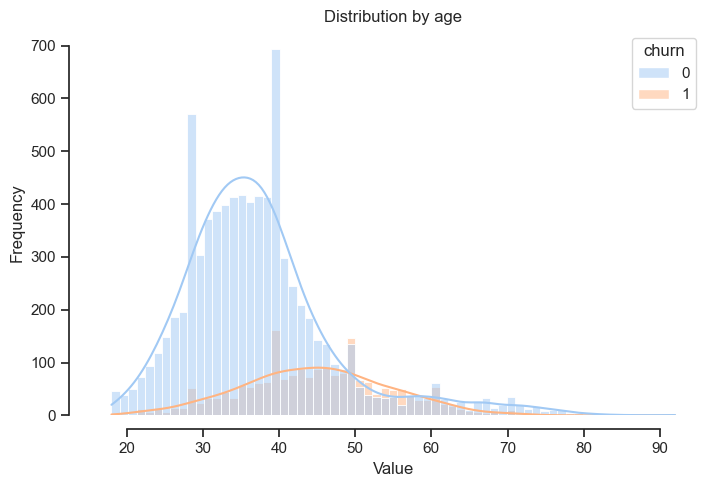

In [25]:
column_hist(bank_dataset, 'age', 'churn',  'by age')

Age is normally distributed, with a visible peak around 30, 40 and 50 for those who stay and a milder peak at 45-55 for those who leave.
Dozens stand out: perhaps this is due to corrugation.

### Define the box plot function

In [26]:
def balance_boxplot(df, hue1, hue2, hue1_name, hue2_name):#table, column names hue, table names  
    sns.set_context('notebook')
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    # first graph
    sns.boxplot(data=df,  x = 'city', y='balance', hue=hue1, ax=axes[0]).set(
    xlabel=None,
    ylabel=None)
    axes[0].set_title('Balance distribution by city and by {}'.format(hue1_name))
    axes[0].legend(loc="upper right", title='{}'.format(hue1_name), title_fontsize=9)
    
    # second graph
    sns.boxplot(data=df, x = 'city', y='balance', hue=hue2, ax=axes[1]).set(
    xlabel=None,
    ylabel=None)
    axes[1].set_title('Balance distribution by city and by {}'.format(hue2_name))
    axes[1].legend(loc="upper right", title='{}'.format(hue2_name),title_fontsize=9)

# display the graph
plt.show()

### Chart on average balance by city, gender and churn status

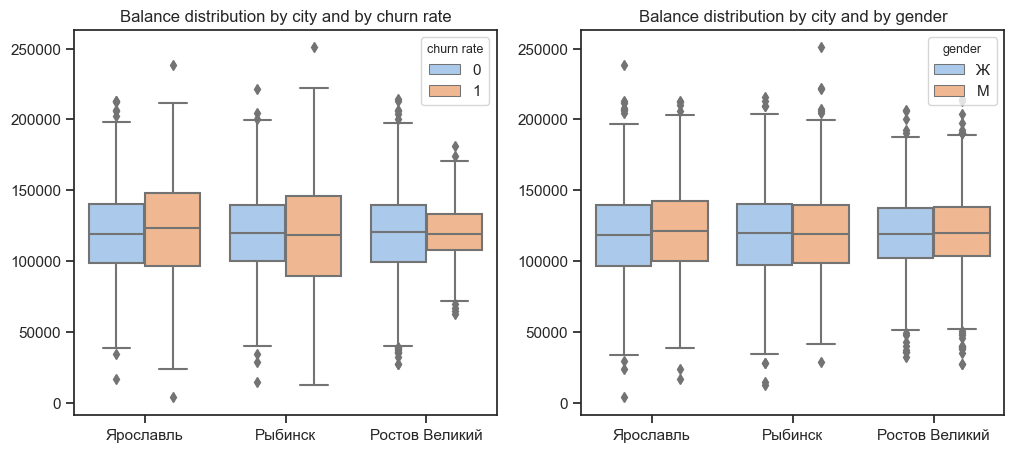

In [27]:
balance_boxplot(bank_dataset,'churn', 'gender', 'churn rate', 'gender')

The average balance slightly differs by city, gender and outflow status - the median is around 120 thousand rubles.

### Chart about the average balance depending on the city, loyalty and availability of a credit card

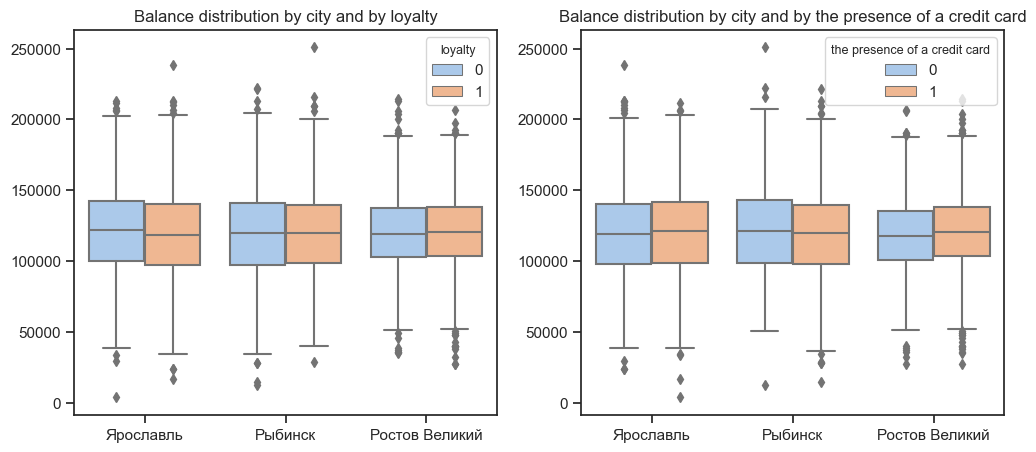

In [28]:
balance_boxplot(bank_dataset,'loyalty', 'credit_card', 'loyalty', 'the presence of a credit card')

The average balance slightly differs by city, loyalty and lack of a credit card - the median is around 120 thousand rubles.

### Diagram of the number of customers depending on the number of products used

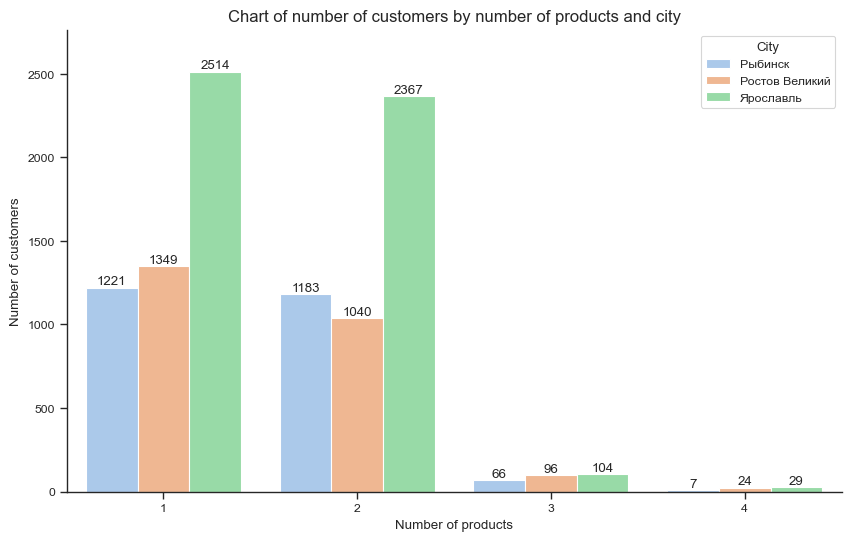

In [29]:

data_ed = bank_dataset.groupby(['products', 'city'], \
                        as_index = False)[['user_id']].nunique().sort_values(by = ['products','user_id'])
# the graph size
plt.figure(figsize=(10, 6))
sns.set_theme()
# styles
sns.set_style('ticks')
sns.set_context('paper')
sns.set_palette('pastel')
# graphs
ax = sns.barplot(y='user_id', x='products', data=data_ed, hue='city')
# add notations
for bars in ax.containers:
        ax.bar_label(bars, fmt='%1.f')


plt.legend(loc="upper right", title="City")

# drop the lines
sns.despine()
# text
plt.margins(y=0.1)
plt.title(
    'Chart of number of customers by number of products and city',
    fontsize=12)
plt.ylabel('Number of customers')
plt.xlabel('Number of products')
plt.xticks(rotation=0)
# display graph
plt.show()

Most of the clients are located in the city of Yaroslavl. At the same time, the most popular customer profile is 1 and 2 products, the distribution is very similar between different cities.

### Define the function for constructing a bar chart

In [30]:
def column_barchart( col, name):
    data_ch = bank_dataset.groupby([col, 'churn'], \
                        as_index = False)[['user_id']].nunique().sort_values(by = [col, 'user_id'],ascending=False)
# graph size
    plt.figure(figsize=(8, 5))
    sns.set_theme()

# graph styles
    sns.set_style('ticks')
    sns.set_context('paper')
    sns.set_palette('pastel')

# graphs
    ax =sns.barplot(x='user_id',y= data_ch[col], data=data_ch, hue ='churn',dodge=False)
    for bars in ax.containers:
            ax.bar_label(bars, fmt='%1.f')

# legend
    plt.legend( title="Churn rate")

#titles
    plt.margins(y=0.1)
    plt.title(
    'Number of customers chart - {} and churn status'.format(name),
    fontsize=12)
    plt.xlabel('Number of customers')
    plt.ylabel('{}'.format(name))
    plt.xticks(rotation=0)

# отображаем график на экране
    plt.show()

### Diagram of the number of customers depending on the number of products used

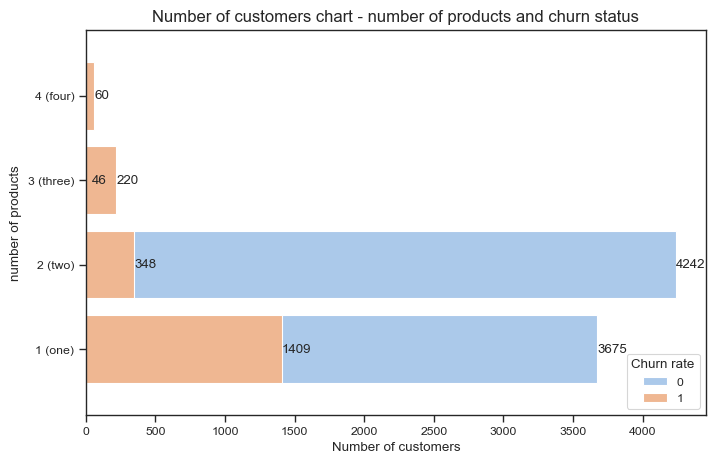

In [31]:
bank_dataset['products_num']= bank_dataset['products']
mapping = {1: '1 (one)', 2: '2 (two)', 3: '3 (three)', 4: '4 (four)'}
bank_dataset['products_num'] = bank_dataset['products_num'].map(mapping)
column_barchart( 'products_num', 'number of products')

Most customers are in the category of those with 1 or 2 products - with the largest churn in the category of one product (1409), by percentage - the largest churn in categories 3 and 4.

Most of the customers from these categories leave, there are no customers left in category 4 of the product.

### Diagram of the number of customers depending on the city

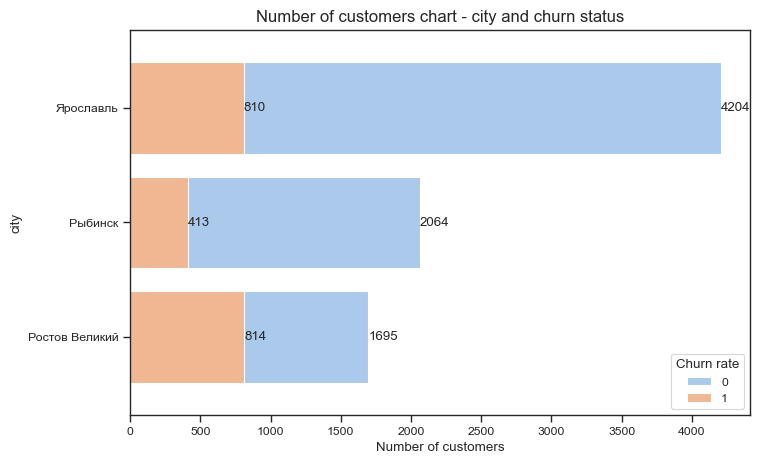

In [32]:
column_barchart( 'city', 'city')

Most of the clients are in Yaroslavl.

At the same time, the outflow is the largest in Veliky Rostov (by percentage).

### Diagram of number of clients by age group

In [33]:
a = [0,10, 30, 50, 70,  90, 100]
percentiles = np.percentile(bank_dataset['age'],a)
percentiles

array([18., 27., 33., 37., 42., 53., 92.])

Let's break customers into age categories according to percentiles:
-    18 - 26, 
 -    27 - 32,
 -    33 - 36,
 -    37 - 41,
 -    42 - 52,
 -  53 - 92.
 
  

In [34]:
labels = [ '18-26', '27-32', '33-36', '37-41', '42-52','53-92']
bank_dataset['age_group'] = pd.cut(bank_dataset['age'], bins=percentiles, labels=labels, right=False)

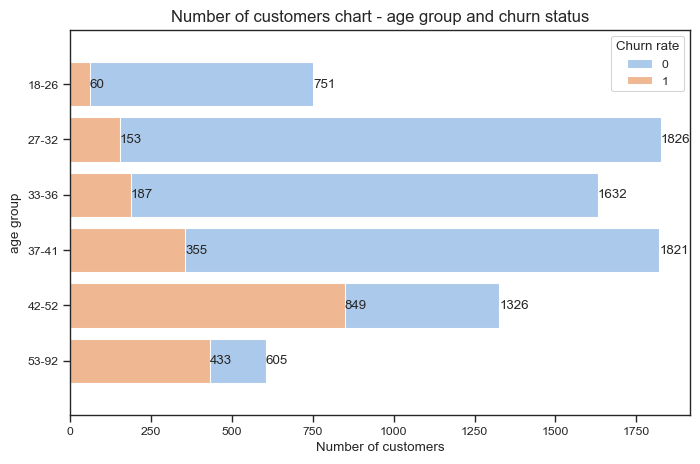

In [35]:
column_barchart( 'age_group', 'age group')

Most of the outflow of customers in the category over 42.

### Diagram of the number of customers depending on the city

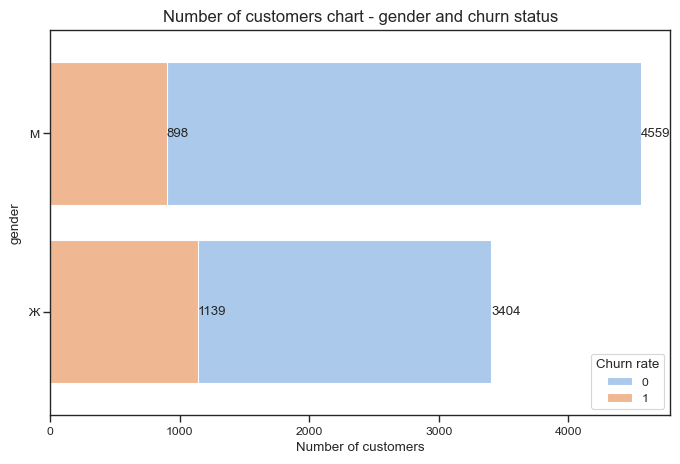

In [36]:
column_barchart( 'gender', 'gender')

We see that the outflow of women is higher than the outflow of men.

### Diagram of the number of customers depending on the city

In [37]:
city_dummies = pd.get_dummies(bank_dataset['city'], prefix='is')
bank_dataset = pd.concat([bank_dataset, city_dummies], axis=1)
bank_dataset

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,...,nan_balance,is_w,city_num,age_gr,salary_group,products_num,age_group,is_Ростов Великий,is_Рыбинск,is_Ярославль
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,...,1,1,0,3,3,1 (one),42-52,0,0,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,...,0,1,1,3,3,1 (one),37-41,0,1,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,...,0,1,0,3,3,3 (three),42-52,0,0,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,...,1,1,0,3,2,2 (two),37-41,0,0,1
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,...,0,1,1,3,2,1 (one),42-52,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,...,1,0,0,3,2,2 (two),37-41,0,0,1
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,...,0,0,0,2,3,1 (one),33-36,0,0,1
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,...,1,1,0,2,1,1 (one),33-36,0,0,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,...,0,0,2,3,2,2 (two),42-52,1,0,0


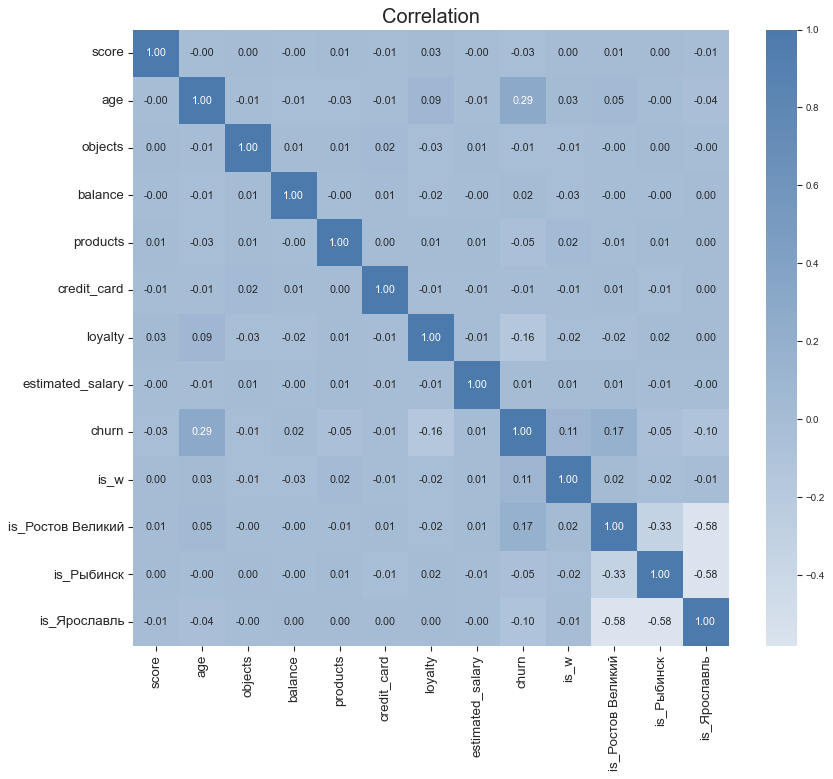

In [38]:
df = bank_dataset[['score','city', 'age', 'objects', 'balance','products', 'credit_card',
                    'loyalty', 'estimated_salary', 'churn','is_w', 'is_Ростов Великий','is_Рыбинск', 'is_Ярославль']]
plt.figure(figsize=(12,10), dpi= 80)
# size
sns.set_theme()
# styles
sns.set_style('ticks')
sns.set_context('paper')


numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, cmap=sns.color_palette("blend:#ffffff,#4d7aac", as_cmap=True),
yticklabels=corr_matrix.columns, center=0, annot=True, fmt=".2f")

# Decorations
plt.title('Correlation', fontsize=18)
plt.xticks(fontsize=12, rotation =90)
plt.yticks(fontsize=12, rotation =0)
plt.show()




We see that the correlation is quite high with age.

### Brief conclusion

We see that the balance is normally distributed. With a peak frequency of 100,000 - 150,000 (with a peak of 50-100 clients from the status of "left" and up to 300 in the status of current clients).
Wages are distributed very evenly, with no visible peaks in both categories.
The average balance slightly differs by city, gender and outflow status - the median is around 120 thousand rubles.
The average balance slightly differs by city, loyalty and lack of a credit card - the median is around 120 thousand rubles.
Most of the clients are located in the city of Yaroslavl. At the same time, the most popular customer profile is 1 and 2 products, the distribution is very similar between different cities.

Most customers are in the category of those with 1 or 2 products - with the largest churn in the category of one product (1409), by percentage - the largest churn in categories 3 and 4.
Most of the customers leave this category, there are no customers left in category 4 of the product.
Most of the clients are in Yaroslavl.

At the same time, the outflow is the largest in Veliky Rostov (by percentage).
Most of the outflow of customers in the category over 42.
churn is higher for women than for men

## Segmentation of bank customers

We will segment the bank's customers into the main 4 or less categories based on the number of products used and the level of outflow.

When broken down by product only, you get 4 clusters. However, when adding other indicators, such as age, we see that the number of clusters is 3 or even 2.

### Estimation of the optimal number of clusters

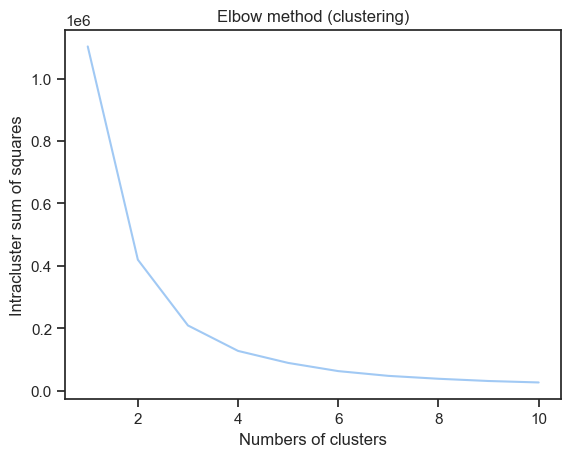

In [39]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(bank_dataset[['products', 'age']])
    wcss.append(kmeans.inertia_)
    sns.set_theme()
# styles
sns.set_style('ticks')

sns.set_palette('pastel')
plt.plot(range(1, 11), wcss)
plt.title('Elbow method (clustering)')
plt.xlabel('Numbers of clusters')
plt.ylabel('Intracluster sum of squares')
plt.show()


The optimal number of clusters is 3 (or 4) clusters. Let's look at another method.

In [40]:
X = bank_dataset[['products','age']]
   
for n_cluster in range(2, 7):
    kmeans = KMeans(n_clusters=n_cluster, n_init=10).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For number of clusters {}, silhouette score {}".format(n_cluster, sil_coeff))


For number of clusters 2, silhouette score 0.5887572845349828
For number of clusters 3, silhouette score 0.534836164483973
For number of clusters 4, silhouette score 0.5200881008591697
For number of clusters 5, silhouette score 0.5046940128918439
For number of clusters 6, silhouette score 0.5042069754685085


The largest coefficient is for the breakdown into two clusters.
We will try to break it down into 3 clusters.

### Breakdown by number of products
Let's break it into clusters according to the number of products.

In [41]:
# number of clusters = 3
kmeans = KMeans(n_clusters=3, n_init=10)

# applying KMeans to dataframe
kmeans.fit( bank_dataset[['products']])

# labeks for clusters
labels = kmeans.labels_

bank_dataset['cluster_products'] = labels


In [42]:
for i in range(0, 3):
    print(
        'Cluster *{}* has customers with the amount of products {}.'.format(
            i,
            bank_dataset[bank_dataset['cluster_products'] == i]['products'].unique()))

Cluster *0* has customers with the amount of products [2].
Cluster *1* has customers with the amount of products [1].
Cluster *2* has customers with the amount of products [3 4].


The product cluster includes customers in three categories:
- 0 cluster - 1 product,
- 1 cluster - 2 products,
- 3 cluster - 3 products.

Let's look at the characteristics of the segments.

In [43]:
cluster = bank_dataset.groupby('cluster_products').agg({
    'user_id': 'nunique',
    'age': 'median',
    'is_w': 'sum',
    'credit_card': 'sum',
    'churn': 'sum',
    'products': 'median'
}).reset_index()
cluster['%W'] =round(100*cluster ['is_w'] /cluster ['user_id'],1)
cluster['%churn'] =round(100*cluster ['churn'] /cluster ['user_id'],1)
cluster

,cluster_products,user_id,age,is_w,credit_card,churn,products,%W,%churn
0,0,4590,36.0,2060,3246,348,2.0,44.9,7.6
1,1,5084,38.0,2296,3578,1409,1.0,45.2,27.7
2,2,326,43.0,187,231,280,3.0,57.4,85.9


The breakdown by clusters is uneven, in clusters 0 and 1 there are a significantly larger number of clients than in cluster 2.

In clusters, there is approximately the same amount of distribution by gender, slightly more in cluster 2.
45% for cluster 0 and 1, 57% for cluster 2.
The outflow is much higher in cluster 2. - 85%, in cluster 0 and 1, the indicator is 27 and 8%, respectively.
### Breakdown by age
Let's break it down into age groups.

In [44]:
# number of clusters = 2
kmeans = KMeans(n_clusters=2, n_init=10)

# applying KMeans to data
kmeans.fit( bank_dataset[['age']])

#lablels
labels = kmeans.labels_

bank_dataset['cluster_age'] = labels


In [45]:
for i in range(0, 2):
    print(
        'Cluster *{}* has customers with the age {}.'.format(
            i,
            bank_dataset[bank_dataset['cluster_age'] == i]['age'].sort_values().unique()))
    

Cluster *0* has customers with the age [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42].
Cluster *1* has customers with the age [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 88 92].


The product cluster includes customers in three categories:
- 0 cluster - 44 - 92 years old,
- 1 cluster - 18 - 43 years old,


Let's look at the characteristics of the segments.

In [46]:
cluster = bank_dataset.groupby('cluster_age').agg({
    'user_id': 'nunique',
    'age': 'median',
    'is_w': 'sum',
    'credit_card': 'sum',
    'churn': 'sum',
    'products': 'median'
}).reset_index()
cluster['%W'] =round(100*cluster ['is_w'] /cluster ['user_id'],1)
cluster['%churn'] =round(100*cluster ['churn'] /cluster ['user_id'],1)

cluster

,cluster_age,user_id,age,is_w,credit_card,churn,products,%W,%churn
0,0,7106,34.0,3150,5046,832,2.0,44.3,11.7
1,1,2894,49.0,1393,2009,1205,1.0,48.1,41.6


The breakdown by age clusters into two clusters is also uneven, in cluster 1 (up to 43 years old inclusive) there are 3 times more clients than in cluster 0 (over 44 inclusive).

In clusters, there is approximately the same amount of distribution by gender, slightly more in cluster 0.
49% for cluster 0, 44% for cluster 1.
The outflow is much higher in cluster 0 - 43%, in cluster 1 the indicator is 12%.

### Breakdown by product and age
Let's make a mixed table for two groups of clusters.

In [47]:
cluster = bank_dataset.groupby(['cluster_products','cluster_age']).agg({
    'user_id': 'nunique',
    'age': 'median',
    'is_w': 'sum',
    'credit_card': 'sum',
    'churn': 'sum',
    'products': 'median'
}).reset_index()
cluster['%W'] =round(100*cluster ['is_w'] /cluster ['user_id'],1)
cluster['%churn'] =round(100*cluster ['churn'] /cluster ['user_id'],1)
cluster['%credit_card'] =round(100*cluster ['credit_card'] /cluster ['user_id'],1)
cluster

,cluster_products,cluster_age,user_id,age,is_w,credit_card,churn,products,%W,%churn,%credit_card
0,0,0,3510,34.0,1553,2488,151,2.0,44.2,4.3,70.9
1,0,1,1080,48.0,507,758,197,2.0,46.9,18.2,70.2
2,1,0,3436,34.0,1509,2442,562,1.0,43.9,16.4,71.1
3,1,1,1648,49.0,787,1136,847,1.0,47.8,51.4,68.9
4,2,0,160,37.0,88,116,119,3.0,55.0,74.4,72.5
5,2,1,166,50.0,99,115,161,3.0,59.6,97.0,69.3


In [48]:
bank_dataset['cluster'] = bank_dataset['cluster_age']
bank_dataset.loc[bank_dataset['cluster_products'] == 2, 'cluster'] = 2 


In [49]:
for i in range(0, 3):
    print(
        'Cluster {} has customers with ages {} and products {}.'.format(
            i,
            bank_dataset[bank_dataset['cluster'] == i]['age'].sort_values().unique(),
            bank_dataset[bank_dataset['cluster'] == i]['products'].sort_values().unique()))
    

Cluster 0 has customers with ages [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42] and products [1 2].
Cluster 1 has customers with ages [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 88 92] and products [1 2].
Cluster 2 has customers with ages [21 22 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 67 68 69 70 71
 77] and products [3 4].


In [50]:
cluster = bank_dataset.groupby('cluster').agg({
    'user_id': 'nunique',
    'age': 'median',
    'is_w': 'sum',
    'credit_card': 'sum',
    'churn': 'sum',
    'products': 'median',
    'objects': 'median',
    'estimated_salary':'median',
    'balance':'median'
}).reset_index()
cluster['%W'] =round(100*cluster ['is_w'] /cluster ['user_id'],1)
cluster['%churn'] =round(100*cluster ['churn'] /cluster ['user_id'],1)
cluster['%credit_card'] =round(100*cluster ['credit_card'] /cluster ['user_id'],1)

cluster

,cluster,user_id,age,is_w,credit_card,churn,products,objects,estimated_salary,balance,%W,%churn,%credit_card
0,0,6946,34.0,3062,4930,713,2.0,5.0,100421.070,119812.510,44.1,10.3,71.0
1,1,2728,49.0,1294,1894,1044,1.0,5.0,99156.495,119889.840,47.4,38.3,69.4
2,2,326,43.0,187,231,280,3.0,5.0,103874.670,120003.275,57.4,85.9,70.9


Differences in 3 segments:

- 0 - customers with 1 or 2 products up to and including 43 years old,
- 1 - customers with 1 or 2 products over 44 years old inclusive
- 2 - customers with more than 2 products.
The difference in churn between customer groups is the lowest in the group with 1 or 2 products up to and including 43 years old, 11%.
Further, the group with 1 or 2 products over 44 years old inclusive, 40%.
And the highest churn rate is in the group with more than 2 products, 86%. However, this group is small.

### Brief conclusion
From the differences in the percentage of churn of different clients, we can offer a breakdown into 3 segments:

- 0 - customers with 1 or 2 products up to and including 43 years old,
- 1 - customers with 1 or 2 products over 44 years old inclusive
- 2 - customers with more than 2 products.
The difference in churn between customer groups is the lowest in the group with 1 or 2 products up to and including 43 years old, 11%.
Further, the group with 1 or 2 products over 44 years old inclusive, 40%.
And the highest churn rate is in the group with more than 2 products, 86%. However, this group is small. 

## Statistical data analysis

Application of statistical methods for further study and verification of segments obtained at the segmentation stage.


### Hypothesis of income difference between segment c 1 and 2 products
Testing the income difference hypothesis between those customers who use two bank products and those who use one.

Let's formulate hypotheses.
- **H0:** Null hypothesis - there are no differences in the distribution of income between those customers who use two bank products and those who use one.
- **H1:** Alternative hypothesis - there are differences in the distribution of income between groups.

The alpha level is set as `0.05`, we check the hypotheses using the Mann-Whitney U-test.

In [51]:
alpha = 0.05
sampleA = bank_dataset[bank_dataset['products'] == 1]['estimated_salary']
sampleB = bank_dataset[bank_dataset['products'] == 2]['estimated_salary']
result = stats.mannwhitneyu(sampleA, sampleB)[1]

print('p-value:', "{0:.2f}".format(result))
if (result < alpha):
    print(
        'We reject the null hypothesis. Cluster 0 customer income distribution differs from cluster 1 income.'
    )
else:
    print(
        'Failed to reject the null hypothesis.',
        'Cluster 0 customers income distribution is the same as cluster 1s income distribution.'
    )

print('Difference in average income between groups:',
      "{0:.4f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.41
Failed to reject the null hypothesis. Cluster 0 customers income distribution is the same as cluster 1s income distribution.
Difference in average income between groups: 0.0097


Failed to reject the null hypothesis. p-value: 0.41.

The income distribution of customers in cluster 0 with 1 product does not differ from the income of cluster 1 with 2 products, while the difference in average income between groups is minimal: 0.0097. We cannot say that there are differences.

### Hypothesis of difference in balance between segment c 1 and 2 products

Testing the balance difference hypothesis between those customers who use two bank products and those who use one.

Let's formulate hypotheses.
- **H0:** Null hypothesis - there are no differences in balance distribution between those clients who use two bank products and those who use one.
- **H1:** An alternative hypothesis - there are differences in the distribution of balas between groups.

The alpha level is set as `0.05`, we check the hypotheses using the Mann-Whitney U-test.

In [52]:
alpha = 0.05 
sampleA = bank_dataset[(~bank_dataset['balance'].isna())&(bank_dataset['products'] == 1)]['balance']
sampleB = bank_dataset[(~bank_dataset['balance'].isna())&(bank_dataset['products'] == 2)]['balance']
result = stats.mannwhitneyu(sampleA,sampleB)[1]

print('p-value:', "{0:.2f}".format(result))
if (result < alpha):
    print('We reject the null hypothesis. Cluster 0 customer balance distribution differs from cluster 1 income.')
else:
    print( 'Failed to reject the null hypothesis.',
        'Cluster 0 customers balance distribution is the same as cluster 1s balance distribution.')
print('Difference in average balance between groups:',"{0:.4f}".format(sampleB.mean()/sampleA.mean()-1))


p-value: 0.62
Failed to reject the null hypothesis. Cluster 0 customers balance distribution is the same as cluster 1s balance distribution.
Difference in average balance between groups: -0.0019


Failed to reject the null hypothesis.
p-value: 0.62
The distribution of the balance of clients in cluster 0 does not differ from the balance in cluster 1
Difference in average balance between groups: -0.0019

### Offers for new products

Category 0 - customers with 1 or 2 products up to and including 43 years of age:

1. "Metanprom" Top Savings - savings account with a high percentage
2. "Metanprom" Refinance - Student loan refinancing
3. "Metanprom" Bonus - a card with a bonus program 

Category 1 - customers with 1 or 2 products over 44 years old inclusive:

1. "Metanprom" Confidence - long-term care insurance
2. Metanprom Capital - online stock trading platform and ETF portfolio
3. "Metanprom" Home Insurance - real estate insurance

Category 2 - customers with more than 2 products:


1. "Metanprom" Private - asset management services. Consultation and individual asset management plan.
2. "Metanprom" Mobile - a convenient asset management interface
3. "Metanprom" Deposit insurance - an opportunity to insure your assets against risks

### Brief conclusion

The hypothesis about the difference in income or balance between customers with 1 and 2 products is not obtained. We see that the difference between these clients in terms of balance and wages is not statistically significant.

Proposals for new products:


`Category 0 - customers with 1 or 2 products up to and including 43 years of age:`

1. "Metanprom" Top Savings - savings account with a high percentage
2. "Metanprom" Refinance - Student loan refinancing
3. "Metanprom" Bonus - a card with a bonus program 

`Category 1 - customers with 1 or 2 products over 44 years old inclusive:`

1. "Metanprom" Confidence - long-term care insurance
2. Metanprom Capital - online stock trading platform and ETF portfolio
3. "Metanprom" Home Insurance - real estate insurance

`Category 2 - customers with more than 2 products:`


1. "Metanprom" Private - asset management services. Consultation and individual asset management plan.
2. "Metanprom" Mobile - a convenient asset management interface
3. "Metanprom" Deposit insurance - an opportunity to insure your assets against risks

`Additional recommendation:`
The number of users with a salary estimate less than the minimum wage in the table: 802. An additional recommendation is to calibrate the client assessment method. Possibly due to a misjudgment, the client gets a low rating and is more likely to leave.

<a id='section_id'></a>


##  Presentation and dashboard preparation

Building a dashboard.


Dashboard: <https://public.tableau.com/views/MetanpromDashboard/MetanpromDashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link> 


Presentation preparation

Presentation: <https://pitch.com/public/bd08b07f-8d69-44cd-bf90-e6f399b19e85> 


## Results


The columns `userid`, `score`, `Age`, `Objects`, `Products` - store quantitative information, written as `int`. 

Columns `City` and `Gender` - store qualitative information, written as `object`. 

Not all establishments have working hours.
 
Columns `Balance` and `estimated_salary` - amount of money, stored in `float` format. The first parameter has most of the rows (**6,383**), the second has all rows.

Columns `CreditCard`, `Loyalty`, `Churn` - written as `int`, take values **0** and **1**. 

We see **10,000** records in the table before the duplicates (gaps) are highlighted.

Column `score` - takes values from **350** to **850**. 

Column `City` - city name, values - 'Yaroslavl' 'Rybinsk' 'Rostov the Great'.

Column `Gender` - sex takes on values - 'W' 'M'.

Column `Age` - age - from **18** to **92**.

Column `Objects` - number of objects owned, minimum value is **0**, maximum value is **10**.

Column `Balance` - balance on the account, from **3,768** to **250,898**.

Column `Products` - number of products used by the client, from **1** to **4**. 

Column `estimated_salary` - salary, from **11** to **199 992**.

There are no obvious duplicates in the table.
The column with salary estimate contains salary values for all categories of clients, and there are strange values.




Number of users with a wage estimate lower than the minimum wage: 802

Number of users with salary valuation less than 1000: 59


Number of users with salary assessment less than 100: 4


Only the `balance` column has omissions - most of the rows have this parameter (6,383 out of 10,000).
Correlations for the column denoting empty balance indicate that one should pay attention to the city, the products, the indicator of whether the user stayed or not.

Fraction of omissions for the columns - city, products, indicator of whether the user stayed or not - show that the most frequent omissions are in Rybinsk and Yaroslavl, for clients with 2 and 3 products, for clients who stayed with the bank.


The balance is normally distributed. With peak frequency values of 100,000 - 150,000 (with a peak of 50-100 clients from the "left" status and up to 300 in the status of current clients).
Salaries are distributed very evenly, with no visible peaks in either category.
The average balance differs slightly by city, gender, and churn status - the median is around 120 thousand rubles.
The average balance differs slightly by city, loyalty and credit card status - median is around 120 thousand rubles.
Most clients are in the city of Yaroslavl. However, the most popular customer portrait is 1 and 2 products, the distribution is very similar between different cities. 

The most clients are in the category with 1 or 2 products - with the highest outflow in the category of 1 product (1409), by percentage - the highest outflow in categories 3 and 4. 
Most of the clients from this category leave, there are no clients left in category 4 products.
Most of the clients are in Yaroslavl. 

At the same time the outflow is the biggest in Rostov Veliky Novgorod (by percentage).
The biggest outflow of clients is in the category over 42.
the female churn is higher than the male churn.


From the differences in the percentage of churn of different clients, a breakdown into 3 segments can be proposed:

- 0 - clients with 1 or 2 products up to and including 43 years old,
- 1 - clients with 1 or 2 products older than 44 years inclusive
- 2 - customers with more than 2 products. 
The difference in churn between customer groups is the lowest in the group with 1 or 2 products up to and including 43 years old, 11%.
Next, the group with 1 or 2 products over and including 44 years, 40%.
And the highest percentage of churn is in the group with more than 2 products, 86%. However, this group is small. 

We do not get the hypothesis of an income or balance difference between customers with 1 and 2 products. We see that the difference between these clients in terms of balance and wages is not statistically significant.


Proposals for new products:


`Category 0 - customers with 1 or 2 products up to and including 43 years of age:`

1. "Metanprom" Top Savings - savings account with a high percentage
2. "Metanprom" Refinance - Student loan refinancing
3. "Metanprom" Bonus - a card with a bonus program 

`Category 1 - customers with 1 or 2 products over 44 years old inclusive:`

1. "Metanprom" Confidence - long-term care insurance
2. Metanprom Capital - online stock trading platform and ETF portfolio
3. "Metanprom" Home Insurance - real estate insurance

`Category 2 - customers with more than 2 products:`


1. "Metanprom" Private - asset management services. Consultation and individual asset management plan.
2. "Metanprom" Mobile - a convenient asset management interface
3. "Metanprom" Deposit insurance - an opportunity to insure your assets against risks

`Additional recommendation:`
The number of users with a salary estimate less than the minimum wage in the table: 802. An additional recommendation is to calibrate the client assessment method. Possibly due to a misjudgment, the client gets a low rating and is more likely to leave.